In [36]:
from datetime import datetime
from distutils.command.clean import clean

import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from PIL.ImageOps import scale
from zmq.backend import second


In [37]:
finished_paths = pd.read_csv("./clean_finished_paths.csv", sep=",")
finished_paths

,hashedIpAddress,timestamp,durationInSec,path,rating,nb_clicks,nb_back_clicks,path_length,source,target,source_category,target_category,source_general_category,target_general_category
0,3824310e536af032,2012-08-12 06:36:52,88,"['14th_century', 'Europe', 'Africa', 'Atlantic...",3,4,0,4,14th_century,African_slave_trade,"['History', 'General_history']","['History', 'General_history']",History,History
1,015245d773376aab,2013-04-23 15:27:08,175,"['14th_century', 'Italy', 'Roman_Catholic_Chur...",3,6,0,6,14th_century,John_F._Kennedy,"['History', 'General_history']","['People', 'USA_Presidents']",History,People
2,36dabfa133b20e3c,2009-08-06 02:31:52,112,"['14th_century', 'China', 'Gunpowder', 'Fire']",2,3,0,3,14th_century,Fire,"['History', 'General_history']","['Science', 'Chemistry', 'General_Chemistry']",History,Science
3,20418ff4797f96be,2008-12-13 17:07:26,139,"['14th_century', 'Time', 'Isaac_Newton', 'Ligh...",1,5,0,5,14th_century,Rainbow,"['History', 'General_history']","['Geography', 'Climate_and_the_Weather']",History,Geography
4,08888b1b428dd90e,2009-01-18 01:18:30,74,"['14th_century', 'Time', 'Light', 'Rainbow']",3,3,0,3,14th_century,Rainbow,"['History', 'General_history']","['Geography', 'Climate_and_the_Weather']",History,Geography
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28398,55150dce4acb74c8,2012-06-28 13:48:17,117,"['Women%27s_rights', 'Property', 'Clothing', '...",5,4,0,4,Women%27s_rights,Autumn,"['Citizenship', 'Animal_and_Human_Rights']","['Geography', 'Climate_and_the_Weather']",Citizenship,Geography
28399,4753cde919cd5ce5,2012-09-26 14:43:56,418,"['Work_%28thermodynamics%29', 'Energy', 'Arist...",3,12,0,12,Work_%28thermodynamics%29,Film,"['Science', 'Physics', 'General_Physics']","['Everyday_life', 'Films']",Science,Everyday_life
28400,052ba30a41ff5a05,2013-06-21 04:05:58,133,"['Work_%28thermodynamics%29', 'Cambridge', 'Ci...",3,6,1,4,Work_%28thermodynamics%29,Pyongyang,"['Science', 'Physics', 'General_Physics']","['Geography', 'Geography_of_Asia']",Science,Geography
28401,2ef7ac844cefda58,2011-03-16 05:42:18,165,"['Yagan', 'Folklore', 'Brothers_Grimm', '<', '...",3,8,1,6,Yagan,Fiction,"['People', 'Historical_figures']","['Language_and_literature', 'Literature_types']",People,Language_and_literature


In [4]:
# Load the data
links = pd.read_csv("./wikispeedia_paths-and-graph/wikispeedia_paths-and-graph/links.tsv", sep="\t", skiprows= 11, names = ["source", "target"])



In [5]:
# create a directed graph
graph = nx.from_pandas_edgelist(links, source="source", target="target", create_using=nx.DiGraph)
page_rank = nx.pagerank(graph)

In [6]:
finished_paths = pd.read_csv("./clean_finished_paths.csv", sep=",")
# add column of ranks to the finished paths for each path
finished_paths["path"] = finished_paths["path"].apply(lambda x: [p[1:-1] for p in x[1:-1].replace(" ", "").split(",")])
finished_paths.head()
#remove backpaths
def remove_backpaths(path):
    new_path = []
    # reverse the path
    path = path[::-1]
    counter = 0
    for page in path:
        if page == "<":
            counter += 1
            continue
        if counter > 0:
            counter -= 1
            continue
        new_path.append(page)
    return new_path[::-1]
finished_paths["clean_path"] = finished_paths["path"].apply(remove_backpaths)
finished_paths.head(80)

,hashedIpAddress,timestamp,durationInSec,path,rating,nb_clicks,nb_back_clicks,path_length,source,target,source_category,target_category,source_general_category,target_general_category,clean_path
0,3824310e536af032,2012-08-12 06:36:52,88,"[14th_century, Europe, Africa, Atlantic_slave_...",3,4,0,4,14th_century,African_slave_trade,"['History', 'General_history']","['History', 'General_history']",History,History,"[14th_century, Europe, Africa, Atlantic_slave_..."
1,015245d773376aab,2013-04-23 15:27:08,175,"[14th_century, Italy, Roman_Catholic_Church, H...",3,6,0,6,14th_century,John_F._Kennedy,"['History', 'General_history']","['People', 'USA_Presidents']",History,People,"[14th_century, Italy, Roman_Catholic_Church, H..."
2,36dabfa133b20e3c,2009-08-06 02:31:52,112,"[14th_century, China, Gunpowder, Fire]",2,3,0,3,14th_century,Fire,"['History', 'General_history']","['Science', 'Chemistry', 'General_Chemistry']",History,Science,"[14th_century, China, Gunpowder, Fire]"
3,20418ff4797f96be,2008-12-13 17:07:26,139,"[14th_century, Time, Isaac_Newton, Light, Colo...",1,5,0,5,14th_century,Rainbow,"['History', 'General_history']","['Geography', 'Climate_and_the_Weather']",History,Geography,"[14th_century, Time, Isaac_Newton, Light, Colo..."
4,08888b1b428dd90e,2009-01-18 01:18:30,74,"[14th_century, Time, Light, Rainbow]",3,3,0,3,14th_century,Rainbow,"['History', 'General_history']","['Geography', 'Climate_and_the_Weather']",History,Geography,"[14th_century, Time, Light, Rainbow]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75,31edea9e55761a1b,2008-11-09 05:25:25,252,"[Achilles_tendon, Latin, United_States, World_...",4,16,0,16,Achilles_tendon,Ivory,"['Science', 'Biology', 'Health_and_medicine']","['Science', 'Chemistry', 'Materials_science']",Science,Science,"[Achilles_tendon, Latin, United_States, World_..."
76,6d136e371e42474f,2008-11-15 00:20:35,103,"[Achilles_tendon, Achilles, Trojan_War, Bronze...",5,8,0,8,Achilles_tendon,Ivory,"['Science', 'Biology', 'Health_and_medicine']","['Science', 'Chemistry', 'Materials_science']",Science,Science,"[Achilles_tendon, Achilles, Trojan_War, Bronze..."
77,6d136e371e42474f,2008-11-15 00:21:35,179,"[Achilles_tendon, Achilles, Ethiopia, Africa, ...",2,7,1,5,Achilles_tendon,Ivory,"['Science', 'Biology', 'Health_and_medicine']","['Science', 'Chemistry', 'Materials_science']",Science,Science,"[Achilles_tendon, Achilles, Ethiopia, Africa, ..."
78,3150e4586833a89c,2012-05-17 03:22:12,219,"[Achilles_tendon, Achilles, Zeus, Domestic_goa...",4,6,0,6,Achilles_tendon,Ivory,"['Science', 'Biology', 'Health_and_medicine']","['Science', 'Chemistry', 'Materials_science']",Science,Science,"[Achilles_tendon, Achilles, Zeus, Domestic_goa..."


In [7]:
# add column of ranks to the finished paths for each path
finished_paths = finished_paths[finished_paths["path_length"] > 1]
finished_paths["ranks"] = finished_paths["clean_path"].apply(lambda x: [page_rank.get(page,-1) for page in x[1:-1]])
finished_paths

,hashedIpAddress,timestamp,durationInSec,path,rating,nb_clicks,nb_back_clicks,path_length,source,target,source_category,target_category,source_general_category,target_general_category,clean_path,ranks
0,3824310e536af032,2012-08-12 06:36:52,88,"[14th_century, Europe, Africa, Atlantic_slave_...",3,4,0,4,14th_century,African_slave_trade,"['History', 'General_history']","['History', 'General_history']",History,History,"[14th_century, Europe, Africa, Atlantic_slave_...","[0.006339517036740152, 0.003167721811701841, 0..."
1,015245d773376aab,2013-04-23 15:27:08,175,"[14th_century, Italy, Roman_Catholic_Church, H...",3,6,0,6,14th_century,John_F._Kennedy,"['History', 'General_history']","['People', 'USA_Presidents']",History,People,"[14th_century, Italy, Roman_Catholic_Church, H...","[0.003717238851113226, 0.002008939572147158, 0..."
2,36dabfa133b20e3c,2009-08-06 02:31:52,112,"[14th_century, China, Gunpowder, Fire]",2,3,0,3,14th_century,Fire,"['History', 'General_history']","['Science', 'Chemistry', 'General_Chemistry']",History,Science,"[14th_century, China, Gunpowder, Fire]","[0.0035655542811307357, 0.000240535942671108]"
3,20418ff4797f96be,2008-12-13 17:07:26,139,"[14th_century, Time, Isaac_Newton, Light, Colo...",1,5,0,5,14th_century,Rainbow,"['History', 'General_history']","['Geography', 'Climate_and_the_Weather']",History,Geography,"[14th_century, Time, Isaac_Newton, Light, Colo...","[0.0006287278756708053, 0.0007206960732407892,..."
4,08888b1b428dd90e,2009-01-18 01:18:30,74,"[14th_century, Time, Light, Rainbow]",3,3,0,3,14th_century,Rainbow,"['History', 'General_history']","['Geography', 'Climate_and_the_Weather']",History,Geography,"[14th_century, Time, Light, Rainbow]","[0.0006287278756708053, 0.0008042394015504177]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28398,55150dce4acb74c8,2012-06-28 13:48:17,117,"[Women%27s_rights, Property, Clothing, Weather...",5,4,0,4,Women%27s_rights,Autumn,"['Citizenship', 'Animal_and_Human_Rights']","['Geography', 'Climate_and_the_Weather']",Citizenship,Geography,"[Women%27s_rights, Property, Clothing, Weather...","[0.000238426835265165, 0.0002789409020456699, ..."
28399,4753cde919cd5ce5,2012-09-26 14:43:56,418,"[Work_%28thermodynamics%29, Energy, Aristotle,...",3,12,0,12,Work_%28thermodynamics%29,Film,"['Science', 'Physics', 'General_Physics']","['Everyday_life', 'Films']",Science,Everyday_life,"[Work_%28thermodynamics%29, Energy, Aristotle,...","[0.0010511884271658697, 0.0011694147791972433,..."
28400,052ba30a41ff5a05,2013-06-21 04:05:58,133,"[Work_%28thermodynamics%29, Cambridge, City_st...",3,6,1,4,Work_%28thermodynamics%29,Pyongyang,"['Science', 'Physics', 'General_Physics']","['Geography', 'Geography_of_Asia']",Science,Geography,"[Work_%28thermodynamics%29, Cambridge, 1st_cen...","[0.00022707892023724122, 0.0005285521554478476..."
28401,2ef7ac844cefda58,2011-03-16 05:42:18,165,"[Yagan, Folklore, Brothers_Grimm, <, 19th_cent...",3,8,1,6,Yagan,Fiction,"['People', 'Historical_figures']","['Language_and_literature', 'Literature_types']",People,Language_and_literature,"[Yagan, Folklore, 19th_century, Charles_Dicken...","[0.00034700374638433864, 0.00241677674706315, ..."


In [8]:
def get_hub(path, ranks):
    return path[np.argmax(ranks)]

finished_paths["hub"] = finished_paths.apply(lambda x: get_hub(x["clean_path"][1:-1], x["ranks"]), axis=1)
        
finished_paths.head()

,hashedIpAddress,timestamp,durationInSec,path,rating,nb_clicks,nb_back_clicks,path_length,source,target,source_category,target_category,source_general_category,target_general_category,clean_path,ranks,hub
0,3824310e536af032,2012-08-12 06:36:52,88,"[14th_century, Europe, Africa, Atlantic_slave_...",3,4,0,4,14th_century,African_slave_trade,"['History', 'General_history']","['History', 'General_history']",History,History,"[14th_century, Europe, Africa, Atlantic_slave_...","[0.006339517036740152, 0.003167721811701841, 0...",Europe
1,015245d773376aab,2013-04-23 15:27:08,175,"[14th_century, Italy, Roman_Catholic_Church, H...",3,6,0,6,14th_century,John_F._Kennedy,"['History', 'General_history']","['People', 'USA_Presidents']",History,People,"[14th_century, Italy, Roman_Catholic_Church, H...","[0.003717238851113226, 0.002008939572147158, 0...",Italy
2,36dabfa133b20e3c,2009-08-06 02:31:52,112,"[14th_century, China, Gunpowder, Fire]",2,3,0,3,14th_century,Fire,"['History', 'General_history']","['Science', 'Chemistry', 'General_Chemistry']",History,Science,"[14th_century, China, Gunpowder, Fire]","[0.0035655542811307357, 0.000240535942671108]",China
3,20418ff4797f96be,2008-12-13 17:07:26,139,"[14th_century, Time, Isaac_Newton, Light, Colo...",1,5,0,5,14th_century,Rainbow,"['History', 'General_history']","['Geography', 'Climate_and_the_Weather']",History,Geography,"[14th_century, Time, Isaac_Newton, Light, Colo...","[0.0006287278756708053, 0.0007206960732407892,...",Color
4,08888b1b428dd90e,2009-01-18 01:18:30,74,"[14th_century, Time, Light, Rainbow]",3,3,0,3,14th_century,Rainbow,"['History', 'General_history']","['Geography', 'Climate_and_the_Weather']",History,Geography,"[14th_century, Time, Light, Rainbow]","[0.0006287278756708053, 0.0008042394015504177]",Light


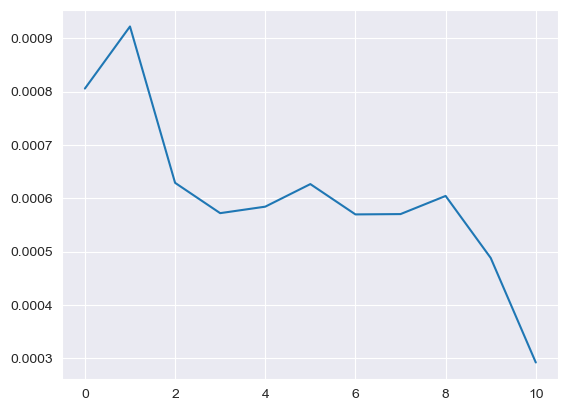

In [9]:
paths_to_plot = finished_paths[finished_paths["path_length"] == 12]["ranks"]
means = []
for i in range(11):
    means.append(np.median([path[i] for path in paths_to_plot]))
plt.plot(means)
plt.show()



In [10]:
# divide the periods into 3 months
from datetime import datetime
import ast
categories = pd.read_csv("./clean_categories.csv")
categories["article"] = categories["article"].apply(lambda x: x)
categories["category"] = categories["category"].apply(lambda x: ast.literal_eval(x))
categories_dict = {}
for index, row in categories.iterrows():
    categories_dict[row["article"]] = row["category"]

finished_paths["hub_categories"] = finished_paths["hub"].apply(lambda x: categories_dict.get(x, "None"))
finished_paths["hub_general_category"] = finished_paths["hub_categories"].apply(lambda x: x[0])
finished_paths.head()

,hashedIpAddress,timestamp,durationInSec,path,rating,nb_clicks,nb_back_clicks,path_length,source,target,source_category,target_category,source_general_category,target_general_category,clean_path,ranks,hub,hub_categories,hub_general_category
0,3824310e536af032,2012-08-12 06:36:52,88,"[14th_century, Europe, Africa, Atlantic_slave_...",3,4,0,4,14th_century,African_slave_trade,"['History', 'General_history']","['History', 'General_history']",History,History,"[14th_century, Europe, Africa, Atlantic_slave_...","[0.006339517036740152, 0.003167721811701841, 0...",Europe,"[Geography, European_Geography]",Geography
1,015245d773376aab,2013-04-23 15:27:08,175,"[14th_century, Italy, Roman_Catholic_Church, H...",3,6,0,6,14th_century,John_F._Kennedy,"['History', 'General_history']","['People', 'USA_Presidents']",History,People,"[14th_century, Italy, Roman_Catholic_Church, H...","[0.003717238851113226, 0.002008939572147158, 0...",Italy,"[Geography, European_Geography, European_Count...",Geography
2,36dabfa133b20e3c,2009-08-06 02:31:52,112,"[14th_century, China, Gunpowder, Fire]",2,3,0,3,14th_century,Fire,"['History', 'General_history']","['Science', 'Chemistry', 'General_Chemistry']",History,Science,"[14th_century, China, Gunpowder, Fire]","[0.0035655542811307357, 0.000240535942671108]",China,[Countries],Countries
3,20418ff4797f96be,2008-12-13 17:07:26,139,"[14th_century, Time, Isaac_Newton, Light, Colo...",1,5,0,5,14th_century,Rainbow,"['History', 'General_history']","['Geography', 'Climate_and_the_Weather']",History,Geography,"[14th_century, Time, Isaac_Newton, Light, Colo...","[0.0006287278756708053, 0.0007206960732407892,...",Color,"[Science, Physics, General_Physics]",Science
4,08888b1b428dd90e,2009-01-18 01:18:30,74,"[14th_century, Time, Light, Rainbow]",3,3,0,3,14th_century,Rainbow,"['History', 'General_history']","['Geography', 'Climate_and_the_Weather']",History,Geography,"[14th_century, Time, Light, Rainbow]","[0.0006287278756708053, 0.0008042394015504177]",Light,"[Science, Physics, General_Physics]",Science


In [11]:
# divide the periods into 3 months
from datetime import datetime
finished_paths["seconds"] = finished_paths["timestamp"].apply(lambda x: datetime.strptime(x, "%Y-%m-%d %H:%M:%S").timestamp())
period = finished_paths["seconds"].max() - finished_paths["seconds"].min()
nb_divisions = 48
division = period / nb_divisions
#sort data by timestamp
min = finished_paths["seconds"].min()
finished_paths = finished_paths.sort_values("seconds")
finished_paths["period"] = (finished_paths["seconds"] - min) // division
#for i in range(nb_divisions):
#    hubs_count = finished_paths[finished_paths["period"] == i]["hub_category"].value_counts()
#    #plot the hubs
#    plt.bar(hubs_count.index, hubs_count.values)
#    plt.xticks(rotation=90)
#    plt.show()

In [12]:
#%matplotlib notebook
target_science = finished_paths
visited_categories_per_period = []
for i in range(nb_divisions):
    visited_categories = {}
    #print("period of time: ", datetime.fromtimestamp(min + i * division), " to ", datetime.fromtimestamp(min + (i + 1) * division))
    for index, row in target_science[target_science["period"] == i].iterrows():
        for article in row["clean_path"][1:-1]:
            category = categories_dict.get(article, "None")
            if category == ["People", "Sports_and_games_people"]:
                if article not in visited_categories:
                    visited_categories[article] = 0
                visited_categories[article] += 1
    visited_categories_per_period.append(visited_categories)



C:\Users\hasse\AppData\Local\Temp\ipykernel_15208\535733556.py:16: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45)


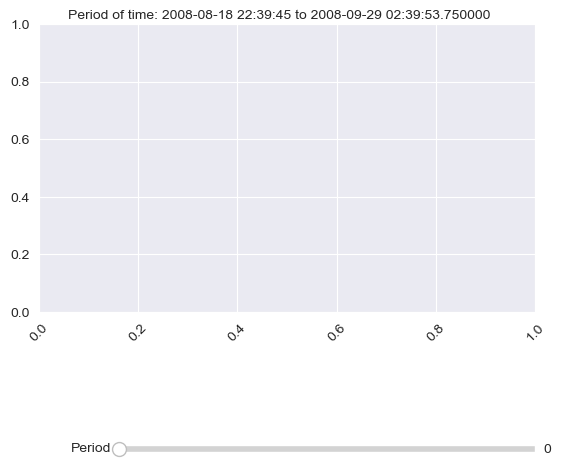

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.widgets import Slider
from datetime import datetime

# Initial data
data = visited_categories_per_period[0]
categories = list(data.keys())
values = list(data.values())

# Create the initial bar plot
fig, ax = plt.subplots()
plt.subplots_adjust(bottom=0.35, top=0.95)  # Adjust the top and bottom space
bars = sns.barplot(x=categories, y=values, ax=ax)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
fig.suptitle("Period of time: " + str(datetime.fromtimestamp(min)) + " to " + str(datetime.fromtimestamp(min + division)), fontsize=10, y=0.98)

# Slider axis
axperiod = plt.axes([0.25, 0.05, 0.65, 0.03], facecolor='lightgoldenrodyellow')  # Adjust the position of the slider
speriod = Slider(axperiod, 'Period', 0, nb_divisions - 1, valinit=0, valstep=1)

def update(val):
    period = int(speriod.val)
    data = visited_categories_per_period[period]
    categories = list(data.keys())
    values = list(data.values())
    categories = categories[:20]
    values = values[:20]
    #sort the categories by values
    categories = [x for _, x in sorted(zip(values, categories), reverse=True)]
    values = sorted(values, reverse=True)

    # Clear the current plot
    ax.clear()

    # Create the updated bar plot
    sns.barplot(x=categories, y=values, ax=ax)
    # put the title in the top of the plot
    fig.suptitle("Period of time: " + str(datetime.fromtimestamp(min + period * division)) + " to " + str(datetime.fromtimestamp(min + (period + 1) * division)), fontsize=10, y=0.98)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
    fig.canvas.draw_idle()

speriod.on_changed(update)
plt.show()

In [14]:
#%matplotlib notebook
#target_science = finished_paths[(finished_paths["source_general_category"] == "Everyday_life") & (finished_paths["target_general_category"] == "Science")]
target_science = finished_paths
visited_hubs_per_period = []
for i in range(nb_divisions):
    visited_hubs = {}
    #print("period of time: ", datetime.fromtimestamp(min + i * division), " to ", datetime.fromtimestamp(min + (i + 1) * division))
    for index, row in target_science[target_science["period"] == i].iterrows():
        hub_category = row["hub_general_category"]
        hub_category = row["hub"]
        if row["hub_general_category"] == "Geography":

            if hub_category not in visited_hubs:
                visited_hubs[hub_category] = 0
            visited_hubs[hub_category] += 1
    visited_hubs_per_period.append(visited_hubs)



C:\Users\hasse\AppData\Local\Temp\ipykernel_15208\2304807294.py:16: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45)


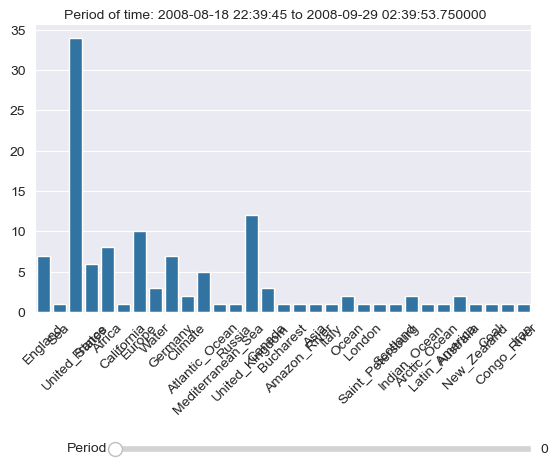

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.widgets import Slider
from datetime import datetime

# Initial data
data = visited_hubs_per_period[0]
categories = list(data.keys())
values = list(data.values())

# Create the initial bar plot
fig, ax = plt.subplots()
plt.subplots_adjust(bottom=0.35, top=0.95)  # Adjust the top and bottom space
bars = sns.barplot(x=categories, y=values, ax=ax)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
fig.suptitle("Period of time: " + str(datetime.fromtimestamp(min)) + " to " + str(datetime.fromtimestamp(min + division)), fontsize=10, y=0.98)

# Slider axis
axperiod = plt.axes([0.25, 0.05, 0.65, 0.03], facecolor='lightgoldenrodyellow')  # Adjust the position of the slider
speriod = Slider(axperiod, 'Period', 0, nb_divisions - 1, valinit=0, valstep=1)

def update(val):
    period = int(speriod.val)
    data = visited_hubs_per_period[period]
    categories = list(data.keys())
    values = list(data.values())
    #sort the categories by values
    categories = [x for _, x in sorted(zip(values, categories), reverse=True)]
    values = sorted(values, reverse=True)
    categories = categories[:10]
    values = values[:10]

    # Clear the current plot
    ax.clear()

    # Create the updated bar plot
    sns.barplot(x=categories, y=values, ax=ax)
    # put the title in the top of the plot
    fig.suptitle("Period of time: " + str(datetime.fromtimestamp(min + period * division)) + " to " + str(datetime.fromtimestamp(min + (period + 1) * division)), fontsize=10, y=0.98)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
    fig.canvas.draw_idle()

speriod.on_changed(update)
plt.show()

In [16]:
#plot distribution of visited hub as a function of the period as colors for each category without slider


In [17]:
finished_paths["intermediate_steps"] = finished_paths["clean_path"].apply(lambda x: x[1:-1])
paths_for_target = finished_paths[["intermediate_steps", "target"]].groupby("target").agg([lambda x: sum(x, []), "count"])
paths_for_target.columns = ["list_of_paths", "paths_count"]
paths_for_target["paths_compo"] = paths_for_target["list_of_paths"].apply(lambda x: {word:x.count(word) for word in set(x)})
paths_for_target = paths_for_target.sort_values("paths_count", ascending=False)

paths_for_target.head(40)

,list_of_paths,paths_count,paths_compo
target,,,
Telephone,"[United_States, Broadcasting, Internet, Copper...",424,"{'Electrical_engineering': 6, 'Sony': 5, 'Musi..."
Viking,"[Russia, Norway, South_America, Continent, Eur...",416,"{'Sony': 1, 'Charlemagne': 1, '2nd_century': 2..."
Zebra,"[Georg_Cantor, Germany, World_War_II, North_Af...",385,"{'Ancient_Egypt': 5, 'Afghanistan': 1, 'Geogra..."
Bean,"[Meat, Protein, Cell_%28biology%29, Plant, Agr...",266,"{'Fertile_Crescent': 1, 'Ancient_Egypt': 43, '..."
Adolf_Hitler,"[Canada, Atlantic_Ocean, Germany, Hebrew_langu...",256,"{'Nuclear_fission': 1, 'Ancient_Egypt': 2, 'As..."
Sun,"[Mathematics, Day, Photosynthesis, Earth%27s_a...",80,"{'Solar_System': 6, 'Ancient_Egypt': 5, 'Unite..."
Jesus,"[19th_century, European_Union, Christianity, E...",79,"{'Ancient_Egypt': 1, 'Solar_System': 1, 'Asia'..."
God,"[Ren%C3%A9_Descartes, Government, Deity, Chris...",68,"{'Ancient_Egypt': 1, 'Asia': 1, 'Terrorism': 1..."
Moon,"[Old_English_language, United_States, Neil_Arm...",60,"{'Bible': 2, 'Solar_eclipse': 3, 'Arctic': 1, ..."


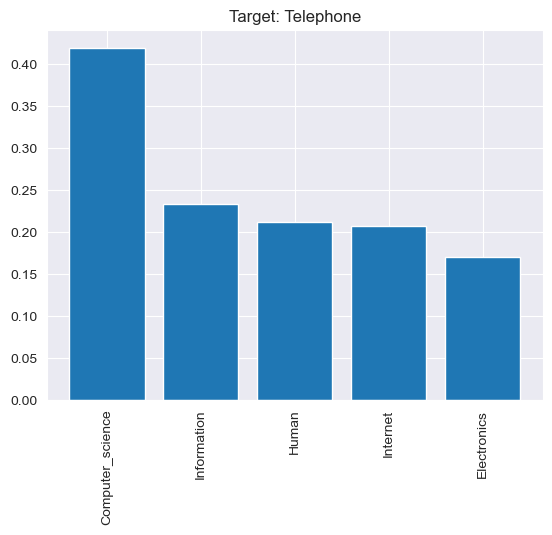

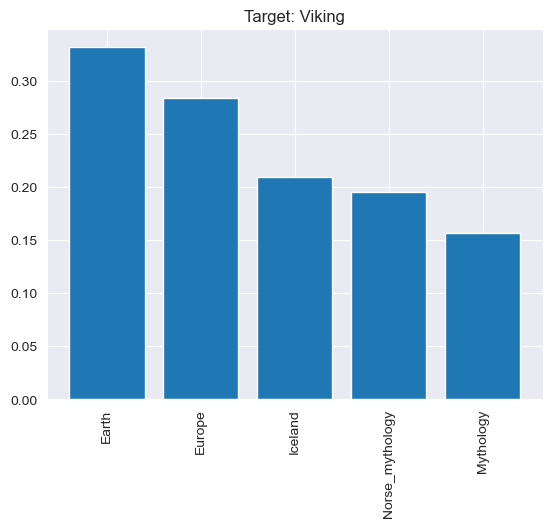

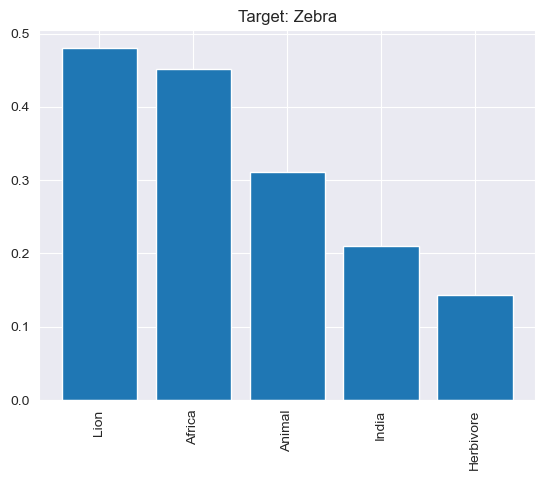

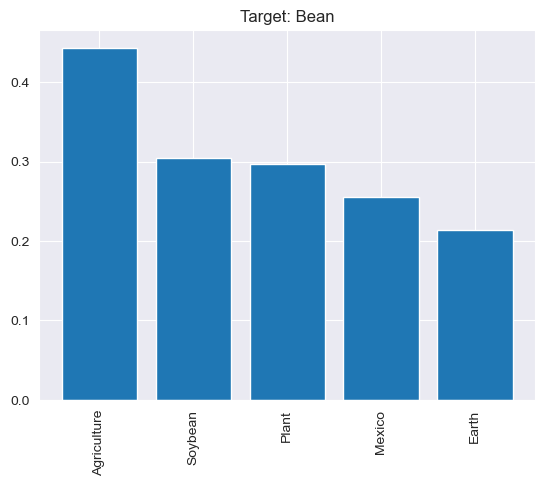

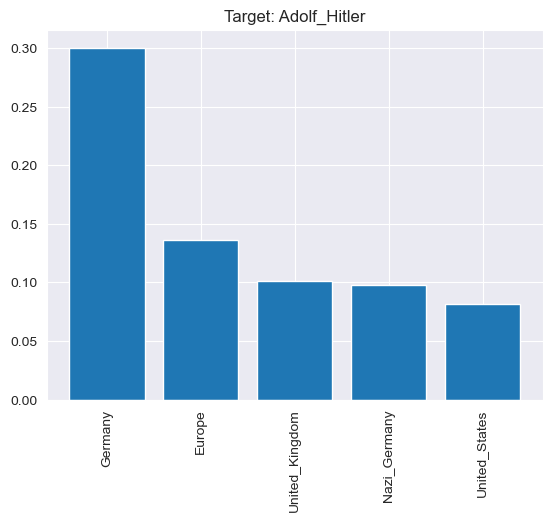

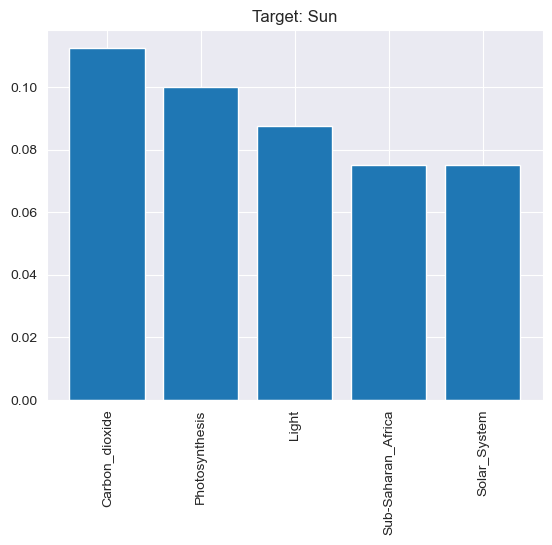

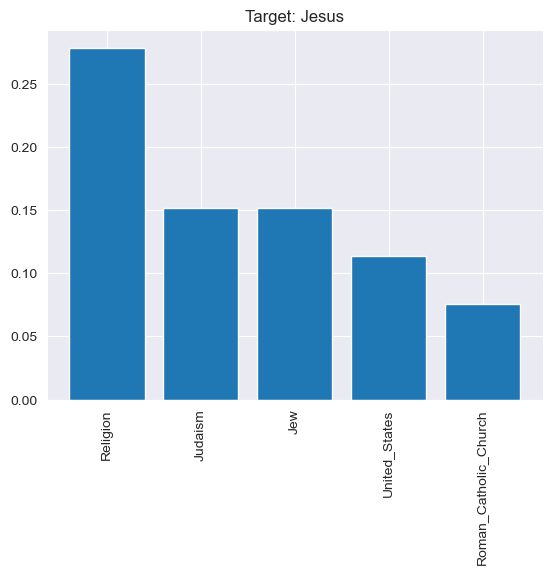

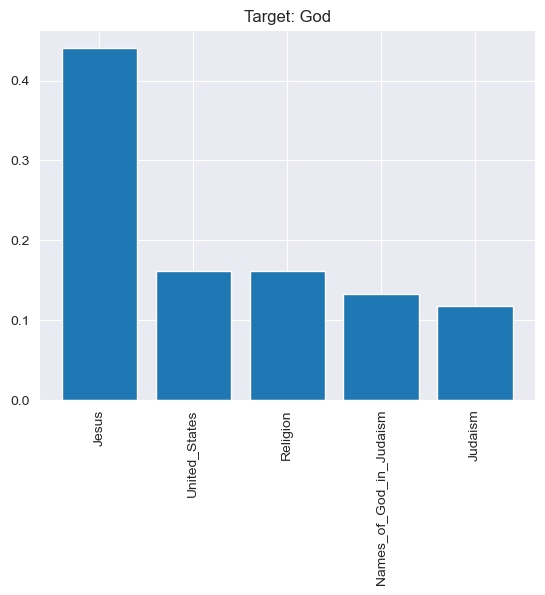

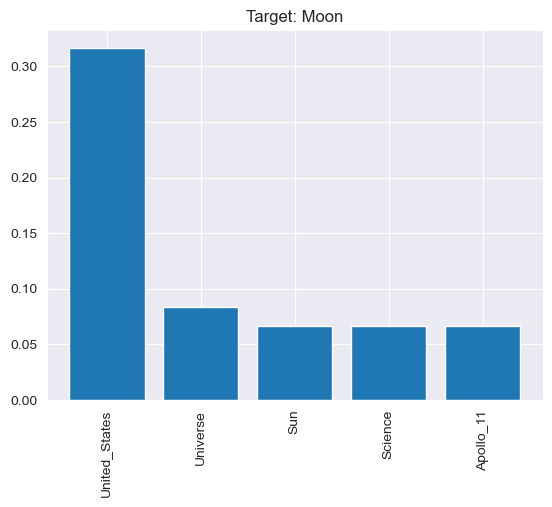

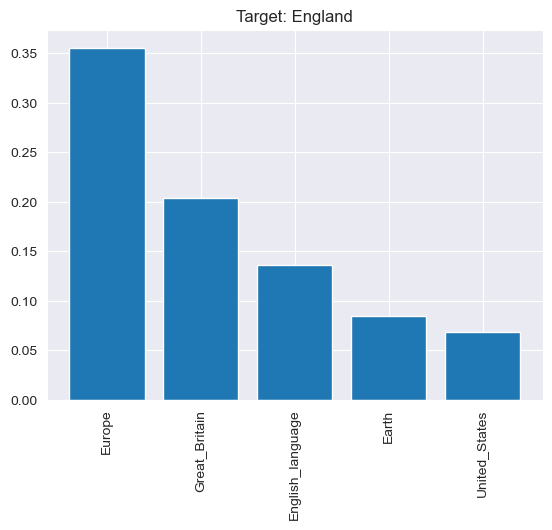

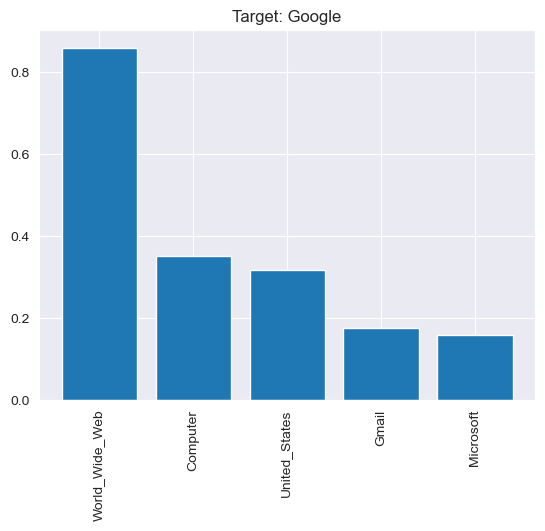

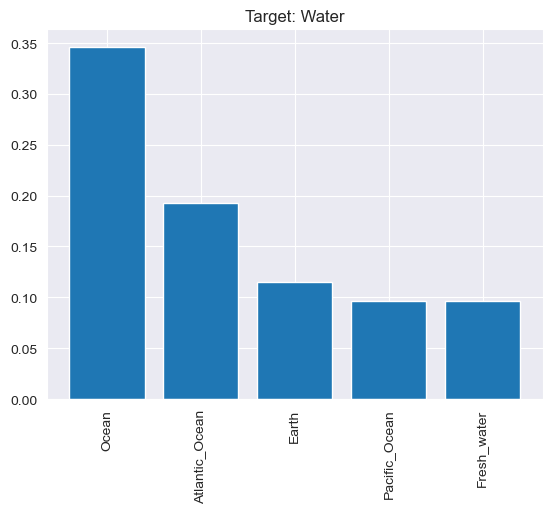

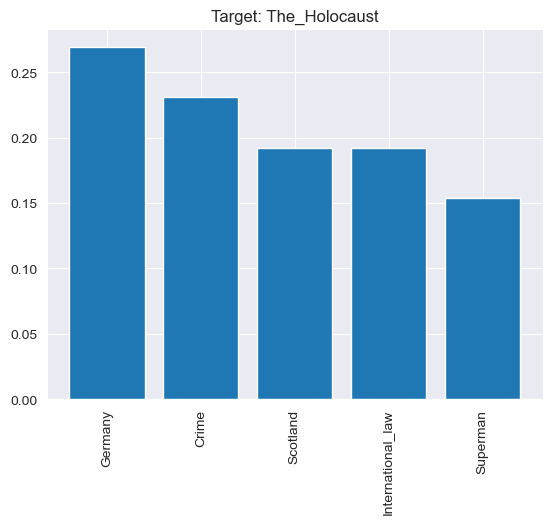

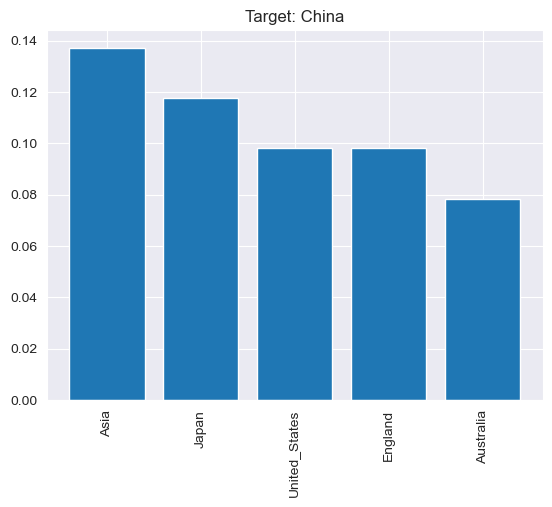

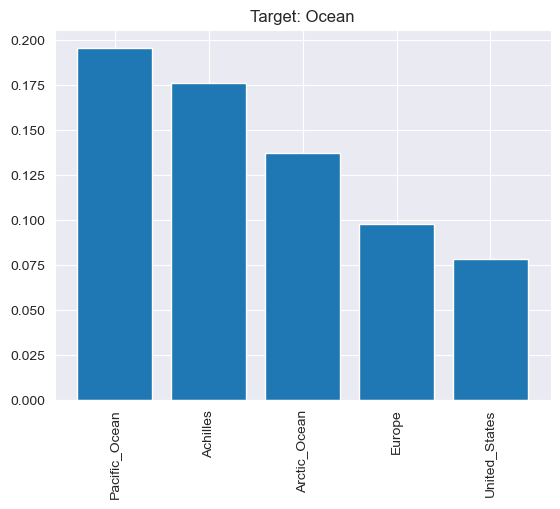

In [18]:
#plt the distribution of path compo for each of the 10 first paths
for i in range(0, 15):
    path_compo = paths_for_target.iloc[i]["paths_compo"]
    nb_paths = paths_for_target.iloc[i]["paths_count"]
    #normalize the values
    for key in path_compo.keys():
        path_compo[key] /= nb_paths
    #sort the categories by values
    keys = list(path_compo.keys())
    values = list(path_compo.values())
    keys = [x for _, x in sorted(zip(values, keys), reverse=True)][1:6]
    values = sorted(values, reverse=True)[1:6]

    plt.bar(keys, values)
    plt.xticks(rotation=90)
    plt.title("Target: " + paths_for_target.index[i])
    plt.show()

In [19]:
grouped_by_categories = finished_paths.groupby(['source_general_category', 'target_general_category']).count()
grouped_by_categories

hashedIpAddress  timestamp  \
source_general_category target_general_category                               
Art                     Art                                    4          4   
                        Business_Studies                       4          4   
                        Citizenship                           12         12   
                        Countries                              6          6   
                        Design_and_Technology                  3          3   
...                                                          ...        ...   
Science                 Mathematics                           80         80   
                        Music                                141        141   
                        People                               728        728   
                        Religion                             212        212   
                        Science                             1576       1576   

                                                 durationInSec  path  rating  \
source_general_category target_general_category                                
Art                     Art                                  4     4       4   
                        Business_Studies                     4     4       4   
                        Citizenship                         12    12      12   
                        Countries                            6     6       6   
                        Design_and_Technology                3     3       3   
...                                                        ...   ...     ...   
Science                 Mathematics                         80    80      80   
                        Music                              141   141     141   
                        People                             728   728     728   
                        Religion                           212   212     212   
                        Science                           1576  1576    1576   

                                                 nb_clicks  nb_back_clicks  \
source_general_category target_general_category                              
Art                     Art                              4               4   
                        Business_Studies                 4               4   
                        Citizenship                     12              12   
                        Countries                        6               6   
                        Design_and_Technology            3               3   
...                                                    ...             ...   
Science                 Mathematics                     80              80   
                        Music                          141             141   
                        People                         728             728   
                        Religion                       212             212   
                        Science                       1576            1576   

                                                 path_length  source  target  \
source_general_category target_general_category                                
Art                     Art                                4       4       4   
                        Business_Studies                   4       4       4   
                        Citizenship                       12      12      12   
                        Countries                          6       6       6   
                        Design_and_Technology              3       3       3   
...                                                      ...     ...     ...   
Science                 Mathematics                       80      80      80   
                        Music                            141     141     141   
                        People                           728     728     728   
                        Religion                         212     212     212   
     

In [20]:
finished_paths.groupby("hashedIpAddress").count()

,timestamp,durationInSec,path,rating,nb_clicks,nb_back_clicks,path_length,source,target,source_category,...,source_general_category,target_general_category,clean_path,ranks,hub,hub_categories,hub_general_category,seconds,period,intermediate_steps
hashedIpAddress,,,,,,,,,,,,,,,,,,,,,
000386124f307de8,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
0007183207b6008f,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
000a09e202e88d10,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
000bc9fe5640ed31,2,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2
000d397013f09039,2,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7ff6629e33e63213,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
7ff67c3433e623a9,2,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2
7ff6a4ad1962969e,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1


In [21]:
target_science[(target_science["path_length"] ==5 ) & (target_science["hub"] == "United_States")]

,hashedIpAddress,timestamp,durationInSec,path,rating,nb_clicks,nb_back_clicks,path_length,source,target,...,source_general_category,target_general_category,clean_path,ranks,hub,hub_categories,hub_general_category,seconds,period,intermediate_steps
1305,321e4b101c5b58ff,2008-08-18 23:38:13,119,"[Climate_change, United_States, Computer, Comp...",3,5,0,5,Climate_change,Scheme_programming_language,...,Geography,IT,"[Climate_change, United_States, Computer, Comp...","[0.00956554538310564, 0.0008486521965096988, 0...",United_States,"[Geography, North_American_Geography]",Geography,1.219095e+09,0.0,"[United_States, Computer, Computer_programming..."
5577,321e4b101c5b58ff,2008-08-18 23:44:41,203,"[Leon_Trotsky, Communism, <, Soviet_Union, Col...",3,11,3,5,Leon_Trotsky,Athletics_%28track_and_field%29,...,People,Everyday_life,"[Leon_Trotsky, Soviet_Union, United_States, Sp...","[0.0022422580916298144, 0.00956554538310564, 0...",United_States,"[Geography, North_American_Geography]",Geography,1.219096e+09,0.0,"[Soviet_Union, United_States, Sport, Olympic_G..."
8004,321e4b101c5b58ff,2008-08-18 23:48:52,75,"[Kakapo, New_Zealand, United_States, Capitalis...",3,5,0,5,Kakapo,Supply_and_demand,...,Science,Business_Studies,"[Kakapo, New_Zealand, United_States, Capitalis...","[0.001702862333100483, 0.00956554538310564, 0....",United_States,"[Geography, North_American_Geography]",Geography,1.219096e+09,0.0,"[New_Zealand, United_States, Capitalism, Market]"
8069,321e4b101c5b58ff,2008-08-19 00:00:38,86,"[Black_pepper, India, United_States, Computer,...",3,5,0,5,Black_pepper,Fedora_Core,...,Everyday_life,IT,"[Black_pepper, India, United_States, Computer,...","[0.004035532403528954, 0.00956554538310564, 0....",United_States,"[Geography, North_American_Geography]",Geography,1.219097e+09,0.0,"[India, United_States, Computer, GNOME]"
3039,321e4b101c5b58ff,2008-08-19 00:09:56,109,[One_Flew_Over_the_Cuckoo%27s_Nest_%28novel%29...,3,7,1,5,One_Flew_Over_the_Cuckoo%27s_Nest_%28novel%29,Carl_Friedrich_Gauss,...,Language_and_literature,People,[One_Flew_Over_the_Cuckoo%27s_Nest_%28novel%29...,"[0.00956554538310564, 0.0008486521965096988, 0...",United_States,"[Geography, North_American_Geography]",Geography,1.219097e+09,0.0,"[United_States, Computer, Trigonometry, Statis..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
445,1cf0cbb3281049ab,2014-01-07 01:18:47,131,"[Asia, Europe, France, United_States, Moon, Ne...",2,5,0,5,Asia,Neil_Armstrong,...,Geography,People,"[Asia, Europe, France, United_States, Moon, Ne...","[0.006339517036740152, 0.006422591500548315, 0...",United_States,"[Geography, North_American_Geography]",Geography,1.389054e+09,47.0,"[Europe, France, United_States, Moon]"
17034,5d861a9f71b78bb4,2014-01-08 18:37:18,94,"[Peter_Grimes, United_Kingdom, World_War_I, Un...",1,7,1,5,Peter_Grimes,Rio_de_Janeiro,...,Language_and_literature,Geography,"[Peter_Grimes, United_Kingdom, World_War_I, Un...","[0.006234853214871948, 0.002560493599026993, 0...",United_States,"[Geography, North_American_Geography]",Geography,1.389203e+09,47.0,"[United_Kingdom, World_War_I, United_States, A..."
21719,2c6345903ebd696d,2014-01-09 16:47:40,106,"[Great_comet, Solar_System, Earth, United_Stat...",3,5,0,5,Great_comet,Boundary_Waters_Canoe_Area_Wilderness,...,Science,Geography,"[Great_comet, Solar_System, Earth, United_Stat...","[0.0006282628995172909, 0.0023478726081676803,...",United_States,"[Geography, North_American_Geography]",Geography,1.389282e+09,47.0,"[Solar_System, Earth, United_States, Minnesota]"
20906,5b35782e77227b54,2014-01-10 18:02:15,185,"[Effect_of_Hurricane_Katrina_on_New_Orleans, U...",4,5,0,5,Effect_of_Hurricane_Katrina_on_New_Orleans,Antelope,...,Geography,Science,"[Effect_of_Hurricane_Katrina_on_New_Orleans, U...","[0.00956554538310564, 0.0009026029799957838, 0...",United_States,"[Geography, North_American_Geography]",Geography,1.389373e+09,47.0,"[United_States, North_Africa, Africa, Cheetah]"


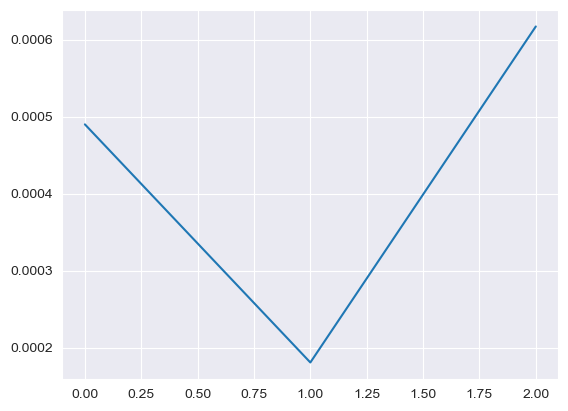

In [22]:
from numpy import random
i = random.randint(0, len(finished_paths))
plt.plot(finished_paths.iloc[i]["ranks"])
plt.show()

In [23]:
#%matplotlib notebook
#target_science = finished_paths[(finished_paths["source_general_category"] == "Everyday_life") & (finished_paths["target_general_category"] == "Science")]
target_science = finished_paths
visited_hubs_per_period = []
for i in range(nb_divisions):
    visited_hubs = {}
    #print("period of time: ", datetime.fromtimestamp(min + i * division), " to ", datetime.fromtimestamp(min + (i + 1) * division))
    for index, row in target_science[target_science["period"] == i].iterrows():
        hub_category = row["target_general_category"]

        if hub_category not in visited_hubs:
            visited_hubs[hub_category] = 0
        visited_hubs[hub_category] += 1
    visited_hubs_per_period.append(visited_hubs)



C:\Users\hasse\AppData\Local\Temp\ipykernel_15208\2304807294.py:16: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45)


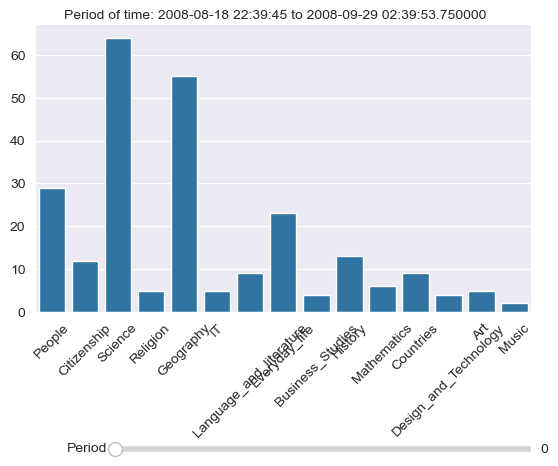

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.widgets import Slider
from datetime import datetime

# Initial data
data = visited_hubs_per_period[0]
categories = list(data.keys())
values = list(data.values())

# Create the initial bar plot
fig, ax = plt.subplots()
plt.subplots_adjust(bottom=0.35, top=0.95)  # Adjust the top and bottom space
bars = sns.barplot(x=categories, y=values, ax=ax)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
fig.suptitle("Period of time: " + str(datetime.fromtimestamp(min)) + " to " + str(datetime.fromtimestamp(min + division)), fontsize=10, y=0.98)

# Slider axis
axperiod = plt.axes([0.25, 0.05, 0.65, 0.03], facecolor='lightgoldenrodyellow')  # Adjust the position of the slider
speriod = Slider(axperiod, 'Period', 0, nb_divisions - 1, valinit=0, valstep=1)

def update(val):
    period = int(speriod.val)
    data = visited_hubs_per_period[period]
    categories = list(data.keys())
    values = list(data.values())
    #sort the categories by values
    categories = [x for _, x in sorted(zip(values, categories), reverse=True)]
    values = sorted(values, reverse=True)
    categories = categories[:10]
    values = values[:10]

    # Clear the current plot
    ax.clear()

    # Create the updated bar plot
    sns.barplot(x=categories, y=values, ax=ax)
    # put the title in the top of the plot
    fig.suptitle("Period of time: " + str(datetime.fromtimestamp(min + period * division)) + " to " + str(datetime.fromtimestamp(min + (period + 1) * division)), fontsize=10, y=0.98)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
    fig.canvas.draw_idle()

speriod.on_changed(update)
plt.show()

In [25]:
# Group by 'target' and aggregate 'clean_path' into a list of all intermediate steps
grouped_paths = finished_paths.groupby('target_general_category')['hub'].apply(lambda x: list(x)).reset_index()
grouped_paths["hub_count"] = grouped_paths["hub"].apply(lambda x: {word:x.count(word) for word in set(x)})
grouped_paths.head(10)

,target_general_category,hub,hub_count
0,Art,"[Bucharest, Scotland, India, Color, United_Kin...","{'Germany': 3, 'Clothing': 1, 'Metal': 1, 'Anc..."
1,Business_Studies,"[United_States, Roman_Empire, London, Europe, ...","{'Natural_gas': 1, 'United_Kingdom': 25, 'Phil..."
2,Citizenship,"[Human, Global_warming, United_States, Canada,...","{'Northern_Ireland': 1, 'Ancient_Egypt': 4, 'A..."
3,Countries,"[United_States, Mediterranean_Sea, Islam, Fran...","{'Vietnam': 1, 'Asia': 21, 'Natural_gas': 1, '..."
4,Design_and_Technology,"[United_States, Science, Water, Bacteria, Phys...","{'Nuclear_fission': 1, 'Ancient_Egypt': 3, 'Na..."
5,Everyday_life,"[United_States, Water, Food, Animal, United_Na...","{'Vietnam': 1, 'Ancient_Egypt': 16, 'Asia': 2,..."
6,Geography,"[Sea, Africa, Climate, Atlantic_Ocean, Earth, ...","{'Asia': 86, 'Afghanistan': 4, 'Nazi_Germany':..."
7,History,"[Europe, Ancient_Greece, Ancient_Greece, Unite...","{'Charlemagne': 1, 'Ancient_Egypt': 5, 'Asia':..."
8,IT,"[United_States, California, United_States, Uni...","{'Sony': 1, 'Ancient_Egypt': 2, 'United_Kingdo..."
9,Language_and_literature,"[France, Atlantic_Ocean, Arabic_language, Euro...","{'Ancient_Egypt': 1, 'Charles_Darwin': 1, 'Uni..."


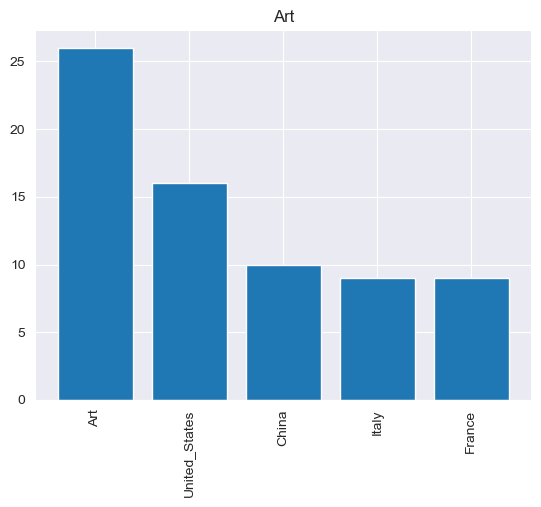

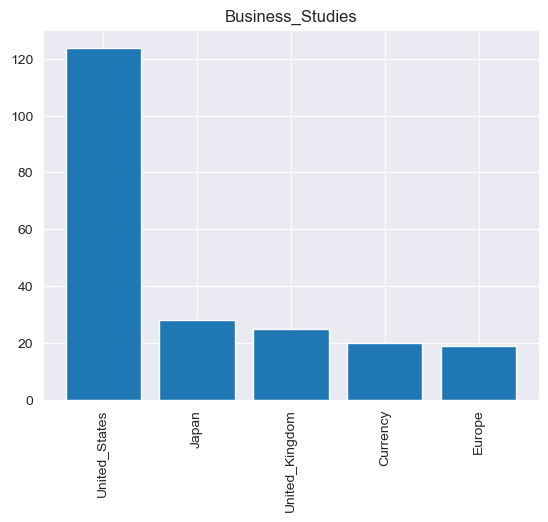

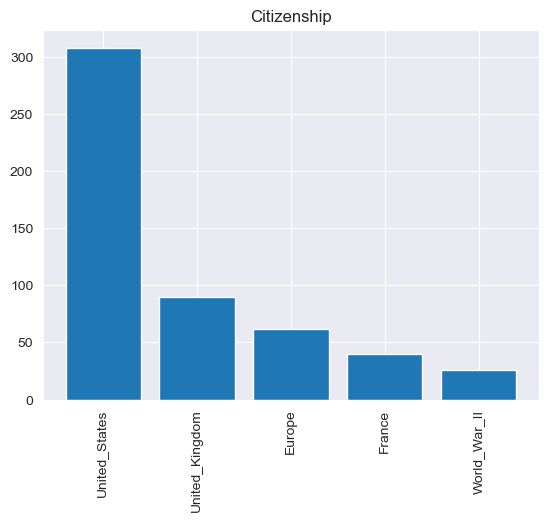

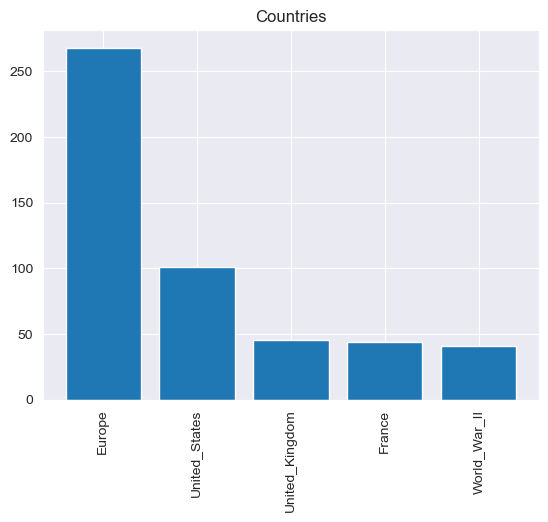

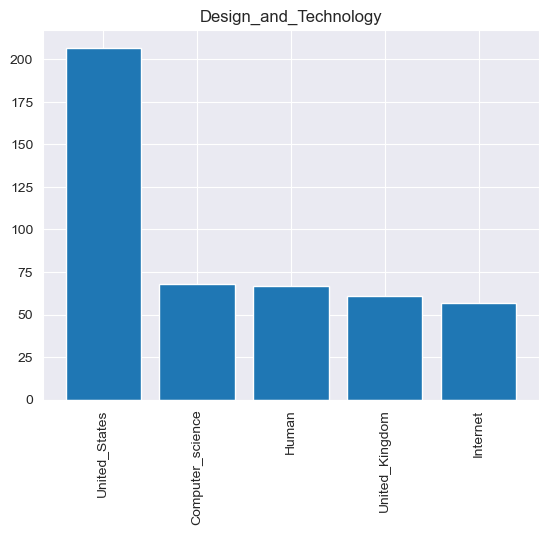

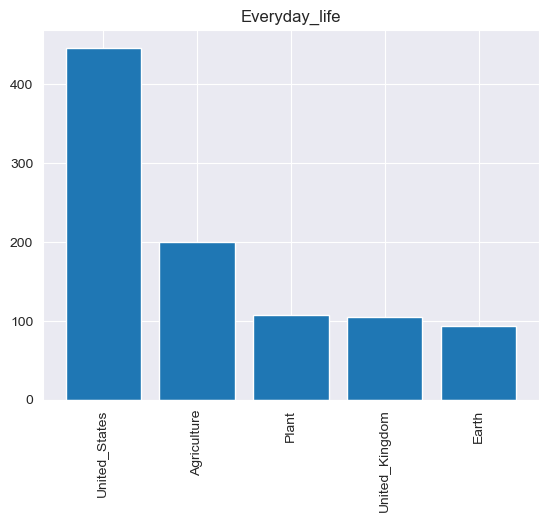

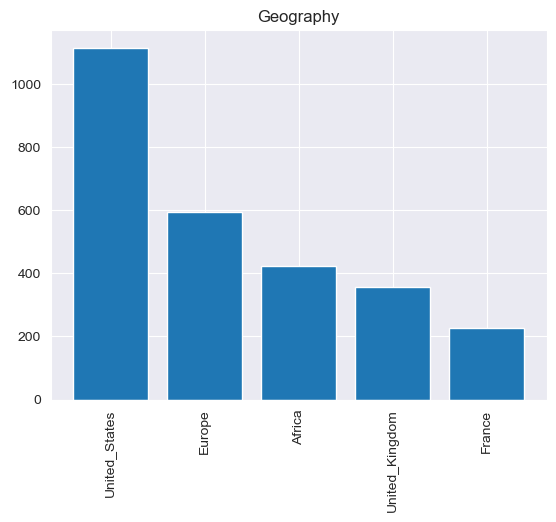

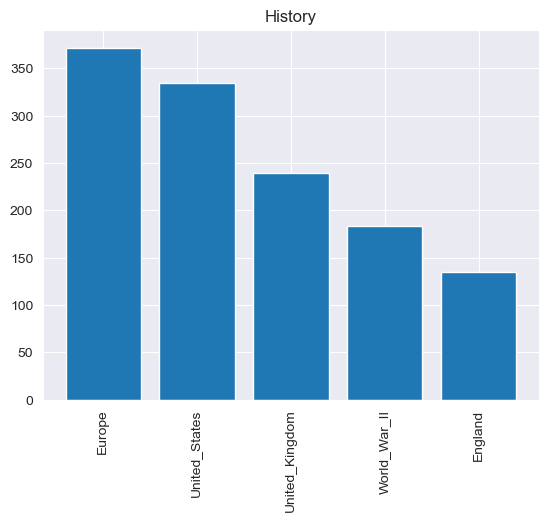

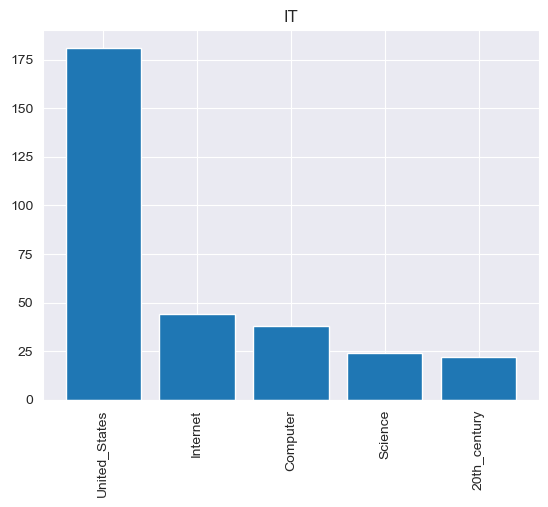

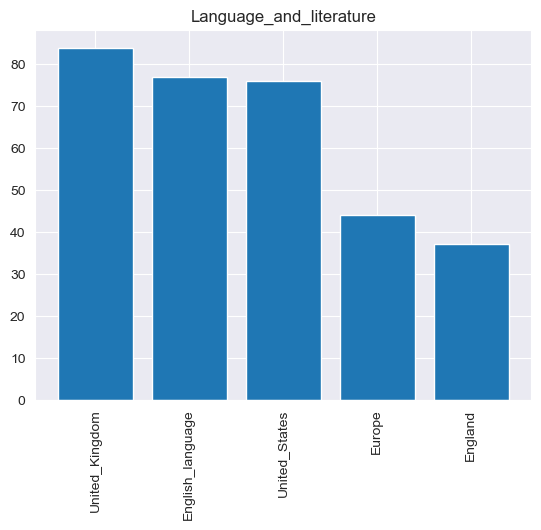

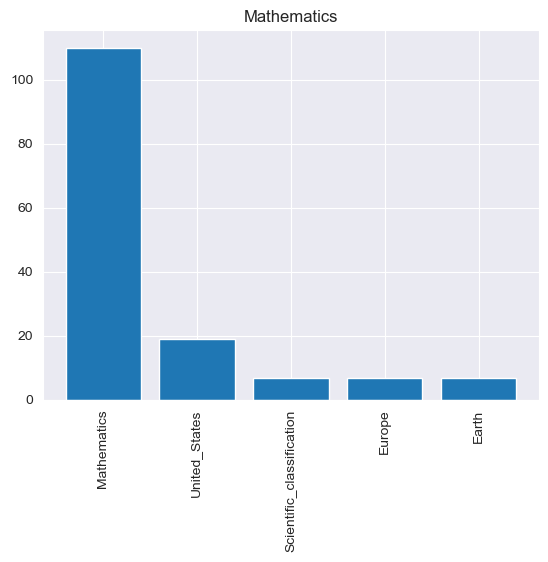

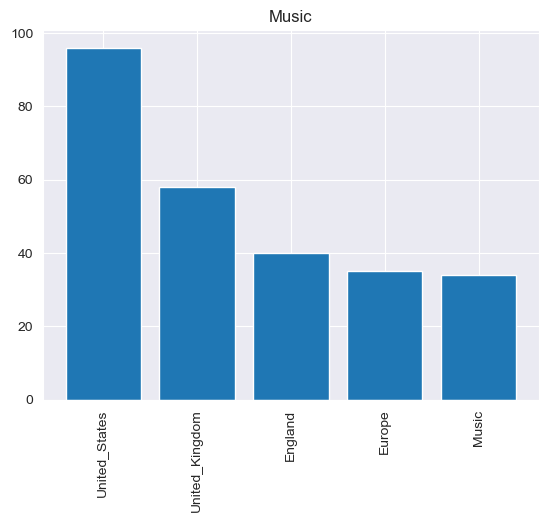

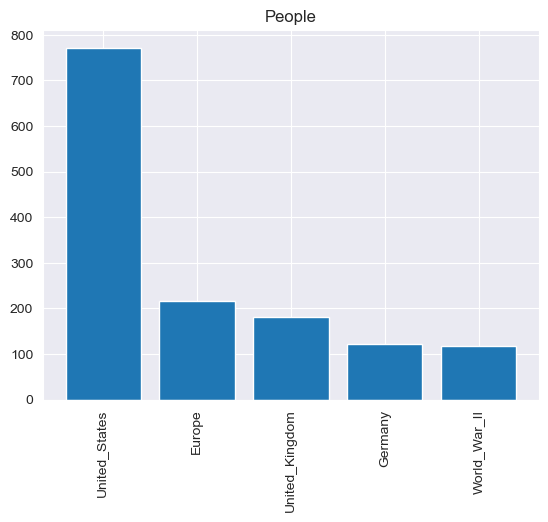

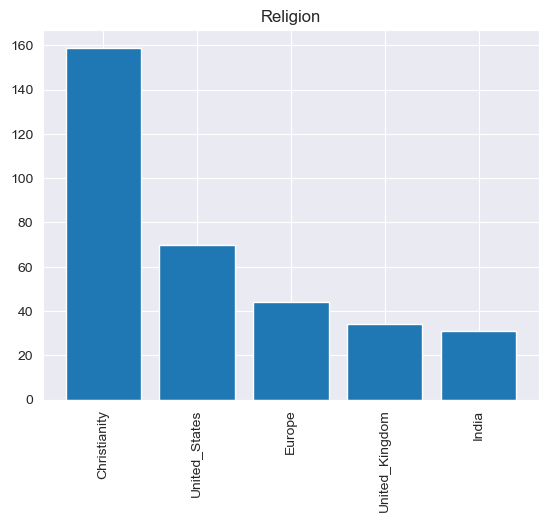

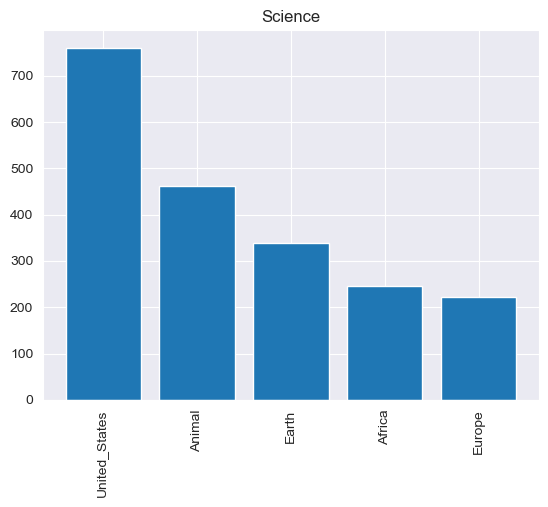

In [26]:
for index, row in grouped_paths.iterrows():
    values = list(row["hub_count"].values())
    keys = list(row["hub_count"].keys())
    keys = [x for _, x in sorted(zip(values, keys), reverse=True)]
    values = sorted(values, reverse=True)
    keys = keys[:5]
    values = values[:5]
    plt.bar(keys, values)   
    plt.title(row["target_general_category"])
    plt.xticks(rotation=90)
    plt.show()

In [38]:
grouped_by_source_target = finished_paths.groupby(['source', 'target']).count()
grouped_by_source_target

hashedIpAddress  \
source                         target                                  
%E2%82%AC2_commemorative_coins Irish_Sea                           1   
10th_century                   11th_century                        3   
                               Banknote                            1   
                               Country                             1   
                               Harlem_Globetrotters                1   
...                                                              ...   
Zulu                           Able_Archer_83                      1   
                               Aluminium                           1   
                               Arctic_Circle                       2   
                               Doom                                1   
                               Slovenia                            2   

                                                     timestamp  durationInSec  \
source                         target                                           
%E2%82%AC2_commemorative_coins Irish_Sea                     1              1   
10th_century                   11th_century                  3              3   
                               Banknote                      1              1   
                               Country                       1              1   
                               Harlem_Globetrotters          1              1   
...                                                        ...            ...   
Zulu                           Able_Archer_83                1              1   
                               Aluminium                     1              1   
                               Arctic_Circle                 2              2   
                               Doom                          1              1   
                               Slovenia                      2              2   

                                                     path  rating  nb_clicks  \
source                         target                                          
%E2%82%AC2_commemorative_coins Irish_Sea                1       1          1   
10th_century                   11th_century             3       3          3   
                               Banknote                 1       1          1   
                               Country                  1       1          1   
                               Harlem_Globetrotters     1       1          1   
...                                                   ...     ...        ...   
Zulu                           Able_Archer_83           1       1          1   
                               Aluminium                1       1          1   
                               Arctic_Circle            2       2          2   
                               Doom                     1       1          1   
                               Slovenia                 2       2          2   

                                                     nb_back_clicks  \
source                         target                                 
%E2%82%AC2_commemorative_coins Irish_Sea                          1   
10th_century                   11th_century                       3   
                               Banknote                           1   
                               Country                            1   
                               Harlem_Globetrotters               1   
...                                                             ...   
Zulu                           Able_Archer_83                     1   
                               Aluminium                          1   
                               Arctic_Circle                      2   
                               Doom                               1   
                               Slovenia                           2   

                                                     path_length  \
source                       

In [35]:
links = pd.read_csv("./wikispeedia_paths-and-graph/wikispeedia_paths-and-graph/links.tsv", sep="\t", skiprows= 11, names = ["source", "target"])
links = links.groupby("source").agg(lambda x: list(x))
#transsform to dict
links = links.to_dict()["target"]
import json
with open("clean_links.json", "w") as f:
    json.dump(links, f)